In [1]:
# Import necessary Libraries
import os
# print("Current directory:", os.getcwd())

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from plot_utils import set_plot_style, set_spines_black

In [3]:
# Load the data (.dat FILE))
x = np.loadtxt("DAT_Files/Ex2_Rational_SINDy.dat")
df = pd.DataFrame(x)
print(df.head(5))

         0        1        2    3    4    5
0  3.00000  9.87688  9.87688  2.0  1.0  0.0
1  2.99988  9.87650  9.87650  1.0  1.0  0.0
2  2.99976  9.87612  9.87612  1.0  1.0  0.0
3  2.99951  9.87536  9.87536  1.0  1.0  0.0
4  2.99903  9.87384  9.87384  1.0  1.0  0.0


In [4]:
print(df.nunique())

0    1385
1    1423
2    1423
3       2
4       1
5       1
dtype: int64


In [5]:
# Identify the indices where the 4th column equals 2 ## untable Branch
ss1 = np.where(x[:, 3] == 2)[0]

In [6]:
print('Index where unstable branch starts:', ss1[1])
print('Index where unstable branch ends:', ss1[-1])

Index where unstable branch starts: 1003
Index where unstable branch ends: 1065


In [7]:
# Coordinates of saddle‐node points
x_sn1, y_sn1 = x[ss1[-1], 0], x[ss1[-1], 1]
x_sn2, y_sn2 = x[ss1[1], 0], x[ss1[1], 1]
print(f"Saddle-node 1: x={x_sn1:.4f}, y={y_sn1:.4f}")
print(f"Saddle-node 2: x={x_sn2:.4f}, y={y_sn2:.4f}")


Saddle-node 1: x=-0.0000, y=0.2134
Saddle-node 2: x=-0.0005, y=0.4733


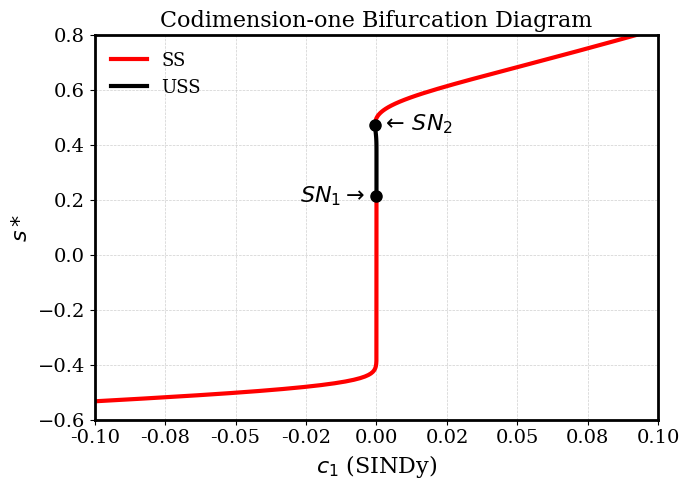

In [8]:
# Initialize Figure
set_plot_style(dpi=100)
plt.figure(figsize=(7, 5))

# Segment 1: Stable branch
plt.plot(
    x[:ss1[1] + 1, 0],
    x[:ss1[1] + 1, 1],
    color='r',
    linewidth=3,
    label='SS'
)

# Segment 2: Unstable branch 
plt.plot(
    x[ss1[1]:ss1[-1] + 1, 0],
    x[ss1[1]:ss1[-1] + 1, 1],
    linestyle='-',
    color='k',
    linewidth=3,
    label='USS'
)

# Segment 3: Stable branch 
plt.plot(
    x[ss1[-1]:, 0],
    x[ss1[-1]:, 1],
    color='r',
    linewidth=3
)

plt.plot(x_sn1, y_sn1, 'o', color='k', markersize=8)
plt.plot(x_sn2, y_sn2, 'o', color='k', markersize=8)
# Annotate the saddle-node points
plt.text(
    x_sn1-0.004, y_sn1,
    r'$SN_1 \rightarrow$',
    fontsize=16,
    ha='right', va='center'
)

plt.text(
    x_sn2+0.002, y_sn2-0.02,
    r'$\leftarrow\,SN_2$',
    fontsize=16,  
)

# Grid, labels, and styling
plt.grid(True, which='both', ls='--', lw=0.5)
plt.title('Codimension-one Bifurcation Diagram')
plt.xlabel(r'$c_1$ (SINDy)')
plt.ylabel(r'$s*$')
plt.xlim(-0.1, 0.1)
plt.ylim(-0.6, 0.8)
# Thicken and color the axis spines
ax = plt.gca()
set_spines_black(ax) 
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
# Add legend
plt.legend(fontsize=13, loc='best', frameon=False)

# Save and show
plt.savefig("Plots_2/CDK1_APC_Rational_SINDy_Bifurcation.pdf", bbox_inches="tight")
plt.show()


In [9]:
#******************************************************* END *********************************************************************************